In [35]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyc_airlines = pd.read_csv("./challenge1/dataset/nyc_airlines.csv")
nyc_airports = pd.read_csv("./challenge1/dataset/nyc_airports.csv")
nyc_flights  = pd.read_csv("./challenge1/dataset/nyc_flights.csv")
nyc_planes   = pd.read_csv("./challenge1/dataset/nyc_planes.csv")
nyc_weather  = pd.read_csv("./challenge1/dataset/nyc_weather.csv")

In [89]:
nyc_airlines

carrier                         name
0       9E            Endeavor Air Inc.
1       AA       American Airlines Inc.
2       AS         Alaska Airlines Inc.
3       B6              JetBlue Airways
4       DL         Delta Air Lines Inc.
5       EV     ExpressJet Airlines Inc.
6       F9       Frontier Airlines Inc.
7       FL  AirTran Airways Corporation
8       HA       Hawaiian Airlines Inc.
9       MQ                    Envoy Air
10      OO        SkyWest Airlines Inc.
11      UA        United Air Lines Inc.
12      US              US Airways Inc.
13      VX               Virgin America
14      WN       Southwest Airlines Co.
15      YV           Mesa Airlines Inc.

In [62]:
nyc_weather

origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0        EWR  2013      1    1     1  39.02  26.06  59.37     270.0   
1        EWR  2013      1    1     2  39.02  26.96  61.63     250.0   
2        EWR  2013      1    1     3  39.02  28.04  64.43     240.0   
3        EWR  2013      1    1     4  39.92  28.04  62.21     250.0   
4        EWR  2013      1    1     5  39.02  28.04  64.43     260.0   
...      ...   ...    ...  ...   ...    ...    ...    ...       ...   
26110    LGA  2013     12   30    14  35.96  19.94  51.78     340.0   
26111    LGA  2013     12   30    15  33.98  17.06  49.51     330.0   
26112    LGA  2013     12   30    16  32.00  15.08  49.19     340.0   
26113    LGA  2013     12   30    17  30.92  12.92  46.74     320.0   
26114    LGA  2013     12   30    18  28.94  10.94  46.41     330.0   

       wind_speed  wind_gust  precip  pressure  visib             time_hour  
0        10.35702        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1         8.05546        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z  
2        11.50780        NaN     0.0    1012.5   10.0  2013-01-01T08:00:00Z  
3        12.65858        NaN     0.0    1012.2   10.0  2013-01-01T09:00:00Z  
4        12.65858        NaN     0.0    1011.9   10.0  2013-01-01T10:00:00Z  
...           ...        ...     ...       ...    ...                   ...  
26110    13.80936   21.86482     0.0    1017.1   10.0  2013-12-30T19:00:00Z  
26111    17.26170   21.86482     0.0    1018.8   10.0  2013-12-30T20:00:00Z  
26112    14.96014   23.01560     0.0    1019.5   10.0  2013-12-30T21:00:00Z  
26113    17.26170        NaN     0.0    1019.9   10.0  2013-12-30T22:00:00Z  
26114    18.41248        NaN     0.0    1020.9   10.0  2013-12-30T23:00:00Z  

[26115 rows x 15 columns]

In [6]:
nyc_flights

Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                0  2013      1    1       517             515          2   
1                1  2013      1    1       533             529          4   
2                2  2013      1    1       542             540          2   
3                3  2013      1    1       554             600         -6   
4                4  2013      1    1       554             558         -4   
...            ...   ...    ...  ...       ...             ...        ...   
277972      335736  2013      9   30      2240            2245         -5   
277973      335737  2013      9   30      2240            2250        -10   
277974      335738  2013      9   30      2241            2246         -5   
277975      335739  2013      9   30      2307            2255         12   
277976      335741  2013      9   30         0            1842          0   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin  \
0            830             819         11      UA    1545  N14228    EWR   
1            850             830         20      UA    1714  N24211    LGA   
2            923             850         33      AA    1141  N619AA    JFK   
3            812             837        -25      DL     461  N668DN    LGA   
4            740             728         12      UA    1696  N39463    EWR   
...          ...             ...        ...     ...     ...     ...    ...   
277972      2334            2351        -17      B6    1816  N354JB    JFK   
277973      2347               7        -20      B6    2002  N281JB    JFK   
277974      2345               1        -16      B6     486  N346JB    JFK   
277975      2359            2358          1      B6     718  N565JB    JFK   
277976         0            2019          0      EV    5274  N740EV    LGA   

       dest  air_time  distance  hour  minute             time_hour  
0       IAH       227      1400     5      15  2013-01-01T10:00:00Z  
1       IAH       227      1416     5      29  2013-01-01T10:00:00Z  
2       MIA       160      1089     5      40  2013-01-01T10:00:00Z  
3       ATL       116       762     6       0  2013-01-01T11:00:00Z  
4       ORD       150       719     5      58  2013-01-01T10:00:00Z  
...     ...       ...       ...   ...     ...                   ...  
277972  SYR        41       209    22      45  2013-10-01T02:00:00Z  
277973  BUF        52       301    22      50  2013-10-01T02:00:00Z  
277974  ROC        47       264    22      46  2013-10-01T02:00:00Z  
277975  BOS        33       187    22      55  2013-10-01T02:00:00Z  
277976  BNA         0       764    18      42  2013-09-30T22:00:00Z  

[277977 rows x 20 columns]

In [78]:
ewr = nyc_flights[nyc_flights['origin']=='EWR']

In [79]:
ewr

Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                0  2013      1    1       517             515          2   
4                4  2013      1    1       554             558         -4   
5                5  2013      1    1       555             600         -5   
11              11  2013      1    1       558             600         -2   
13              13  2013      1    1       559             600         -1   
...            ...   ...    ...  ...       ...             ...        ...   
277961      335723  2013      9   30      2142            2129         13   
277963      335726  2013      9   30      2149            2156         -7   
277964      335727  2013      9   30      2150            2159         -9   
277967      335731  2013      9   30      2211            2059         72   
277969      335733  2013      9   30      2233            2113         80   

        arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin  \
0            830             819         11      UA    1545  N14228    EWR   
4            740             728         12      UA    1696  N39463    EWR   
5            913             854         19      B6     507  N516JB    EWR   
11           923             937        -14      UA    1124  N53441    EWR   
13           854             902         -8      UA    1187  N76515    EWR   
...          ...             ...        ...     ...     ...     ...    ...   
277961      2250            2239         11      EV    4509  N12957    EWR   
277963      2245            2308        -23      UA     523  N813UA    EWR   
277964      2250            2306        -16      EV    3842  N10575    EWR   
277967      2339            2242         57      EV    4672  N12145    EWR   
277969       112              30         42      UA     471  N578UA    EWR   

       dest  air_time  distance  hour  minute             time_hour  
0       IAH       227      1400     5      15  2013-01-01T10:00:00Z  
4       ORD       150       719     5      58  2013-01-01T10:00:00Z  
5       FLL       158      1065     6       0  2013-01-01T11:00:00Z  
11      SFO       361      2565     6       0  2013-01-01T11:00:00Z  
13      LAS       337      2227     6       0  2013-01-01T11:00:00Z  
...     ...       ...       ...   ...     ...                   ...  
277961  PWM        47       284    21      29  2013-10-01T01:00:00Z  
277963  BOS        37       200    21      56  2013-10-01T01:00:00Z  
277964  MHT        39       209    21      59  2013-10-01T01:00:00Z  
277967  STL       120       872    20      59  2013-10-01T00:00:00Z  
277969  SFO       318      2565    21      13  2013-10-01T01:00:00Z  

[113385 rows x 20 columns]

# Determine the number of distinct destinations connected to the airport

In [11]:
ewr.dest.nunique()

82

In [12]:
ewr[ewr['origin']=='EWR'].dest.unique()

array(['IAH', 'ORD', 'FLL', 'SFO', 'LAS', 'PBI', 'MIA', 'ATL', 'PHX',
       'MSP', 'LAX', 'IAD', 'CLT', 'SNA', 'TPA', 'RSW', 'SEA', 'DEN',
       'MCO', 'BOS', 'JAX', 'CHS', 'MEM', 'DFW', 'MYR', 'JAC', 'RDU',
       'DTW', 'SAN', 'MDW', 'CLE', 'EGE', 'DCA', 'AVL', 'STL', 'BUF',
       'IND', 'MKE', 'PWM', 'SAV', 'SYR', 'CMH', 'ROC', 'BWI', 'BTV',
       'DAY', 'HOU', 'ALB', 'BDL', 'SLC', 'PIT', 'HNL', 'MHT', 'MSN',
       'GSO', 'CVG', 'AUS', 'RIC', 'GSP', 'GRR', 'MCI', 'BNA', 'SAT',
       'SDF', 'PDX', 'OMA', 'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'ORF',
       'XNA', 'MSY', 'CAE', 'PHL', 'HDN', 'BZN', 'MTJ', 'SBN', 'TVC',
       'ANC'], dtype=object)

# Calculate the avg of distinct destinations for each day

In [16]:
dest_per_day = ewr.groupby(['year','month','day'],as_index=False).agg(dest_per_day = ('dest','nunique'))
dest_per_day

year  month  day  dest_per_day
0    2013      1    1            71
1    2013      1    2            73
2    2013      1    3            72
3    2013      1    4            71
4    2013      1    5            61
..    ...    ...  ...           ...
360  2013     12   27            70
361  2013     12   28            70
362  2013     12   29            71
363  2013     12   30            69
364  2013     12   31            63

[365 rows x 4 columns]

In [18]:
dest_per_day.dest_per_day.mean()

68.22191780821917

In [22]:
ewr['date'] = date(ewr['year'], ewr['month'], ewr['day'])
ewr

In [29]:
max_flights = ewr.groupby(['month'], as_index=False).agg(flights_per_day = ('flight','count'))

max_flights

month  flights_per_day
0       1             9246
1       2             8400
2       3             9669
3       4             9818
4       5             9931
5       6             9490
6       7             9765
7       8             9727
8       9             8994
9      10             9657
10     11             9277
11     12             9411

In [37]:
max_flights[max_flights['flights_per_day']==max_flights.flights_per_day.max()]

month  flights_per_day
4      5             9931

<Axes: xlabel='month', ylabel='flights_per_day'>

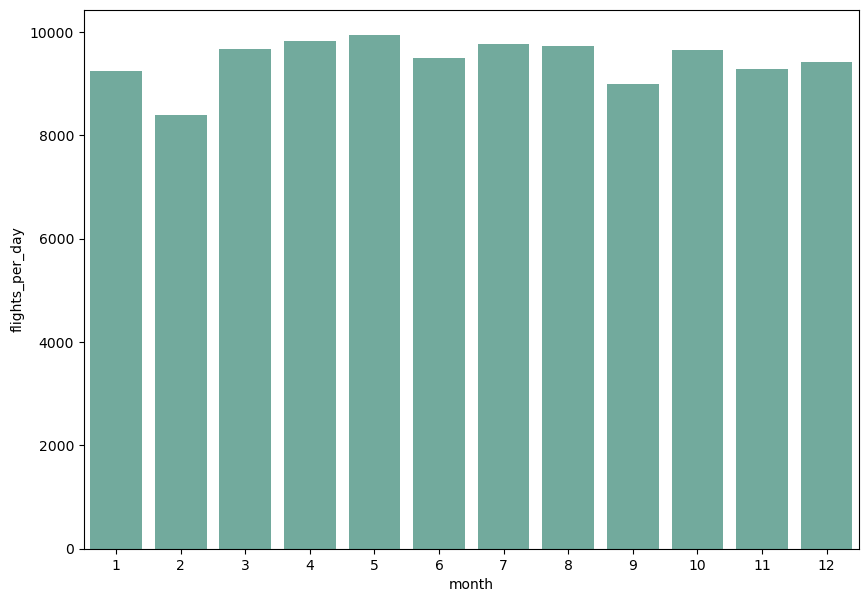

In [36]:
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="month", 
    y="flights_per_day", 
    data=max_flights, 
    color='#69b3a2')

In [42]:
x = ewr.groupby('month',as_index=False).agg(sum_delays = ('dep_delay', 'sum'))

In [45]:
df = max_flights.merge(x, how='left', on='month')
df['avg'] = df['sum_delays']/df['flights_per_day']

In [46]:
df

month  flights_per_day  sum_delays        avg
0       1             9246      137745  14.897794
1       2             8400      108103  12.869405
2       3             9669      174307  18.027407
3       4             9818      167060  17.015685
4       5             9931      150919  15.196758
5       6             9490      209184  22.042571
6       7             9765      214017  21.916743
7       8             9727      130502  13.416470
8       9             8994       64724   7.196353
9      10             9657       84273   8.726623
10     11             9277       62299   6.715425
11     12             9411      190453  20.237276

In [49]:
df[df['sum_delays']==df.sum_delays.max()]

month  flights_per_day  sum_delays        avg
6      7             9765      214017  21.916743

In [61]:
monthly_delays = ewr[ewr['dep_delay']>0].groupby('month',as_index=False).agg(sum_delays_only_delay = ('dep_delay', 'sum'))
monthly_delays

month  sum_delays_only_delay
0       1                 158147
1       2                 126996
2       3                 194218
3       4                 190438
4       5                 172293
5       6                 227657
6       7                 231943
7       8                 152412
8       9                  94085
9      10                 112417
10     11                  88803
11     12                 204399

In [59]:
df2 = df.merge(y, how='left', on='month')
df2

month  flights_per_day  sum_delays        avg  sum_delays_only_delay
0       1             9246      137745  14.897794                 158147
1       2             8400      108103  12.869405                 126996
2       3             9669      174307  18.027407                 194218
3       4             9818      167060  17.015685                 190438
4       5             9931      150919  15.196758                 172293
5       6             9490      209184  22.042571                 227657
6       7             9765      214017  21.916743                 231943
7       8             9727      130502  13.416470                 152412
8       9             8994       64724   7.196353                  94085
9      10             9657       84273   8.726623                 112417
10     11             9277       62299   6.715425                  88803
11     12             9411      190453  20.237276                 204399

In [60]:
df2['sum_delays_only_delay'] - df2['sum_delays']

0     20402
1     18893
2     19911
3     23378
4     21374
5     18473
6     17926
7     21910
8     29361
9     28144
10    26504
11    13946
dtype: int64

In [64]:
ewr_weather = nyc_weather[nyc_weather['origin']=='EWR']
ewr_weather

origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0       EWR  2013      1    1     1  39.02  26.06  59.37     270.0   
1       EWR  2013      1    1     2  39.02  26.96  61.63     250.0   
2       EWR  2013      1    1     3  39.02  28.04  64.43     240.0   
3       EWR  2013      1    1     4  39.92  28.04  62.21     250.0   
4       EWR  2013      1    1     5  39.02  28.04  64.43     260.0   
...     ...   ...    ...  ...   ...    ...    ...    ...       ...   
8698    EWR  2013     12   30    14  37.04  21.02  51.95     320.0   
8699    EWR  2013     12   30    15  35.06  17.96  49.30     340.0   
8700    EWR  2013     12   30    16  33.08  15.98  48.98     320.0   
8701    EWR  2013     12   30    17  30.92  12.92  46.74     340.0   
8702    EWR  2013     12   30    18  28.94  12.02  48.69     330.0   

      wind_speed  wind_gust  precip  pressure  visib             time_hour  
0       10.35702        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1        8.05546        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z  
2       11.50780        NaN     0.0    1012.5   10.0  2013-01-01T08:00:00Z  
3       12.65858        NaN     0.0    1012.2   10.0  2013-01-01T09:00:00Z  
4       12.65858        NaN     0.0    1011.9   10.0  2013-01-01T10:00:00Z  
...          ...        ...     ...       ...    ...                   ...  
8698    17.26170   24.16638     0.0    1017.6   10.0  2013-12-30T19:00:00Z  
8699    17.26170   25.31716     0.0    1019.1   10.0  2013-12-30T20:00:00Z  
8700    14.96014        NaN     0.0    1019.8   10.0  2013-12-30T21:00:00Z  
8701    16.11092        NaN     0.0    1020.5   10.0  2013-12-30T22:00:00Z  
8702    14.96014   23.01560     0.0    1021.1   10.0  2013-12-30T23:00:00Z  

[8703 rows x 15 columns]

In [71]:
ewr_weather.columns

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

In [74]:
ewr_weather = (ewr_weather
 .groupby(['origin', 'year', 'month', 'day', 'hour'],as_index=False)
 .agg(temp=('temp','mean'),
     dewp=('dewp','mean'),
     humid=('humid','mean'),
     wind_dir=('wind_dir','mean'),
     wind_speed=('wind_speed','mean'),
     wind_gust=('wind_gust','mean'),
     precip=('precip','mean'),
     pressure=('pressure','mean'),
     visib=('visib','mean')
     )
)

In [76]:
ewr_weather

origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0       EWR  2013      1    1     1  39.02  26.06  59.37     270.0   
1       EWR  2013      1    1     2  39.02  26.96  61.63     250.0   
2       EWR  2013      1    1     3  39.02  28.04  64.43     240.0   
3       EWR  2013      1    1     4  39.92  28.04  62.21     250.0   
4       EWR  2013      1    1     5  39.02  28.04  64.43     260.0   
...     ...   ...    ...  ...   ...    ...    ...    ...       ...   
8697    EWR  2013     12   30    14  37.04  21.02  51.95     320.0   
8698    EWR  2013     12   30    15  35.06  17.96  49.30     340.0   
8699    EWR  2013     12   30    16  33.08  15.98  48.98     320.0   
8700    EWR  2013     12   30    17  30.92  12.92  46.74     340.0   
8701    EWR  2013     12   30    18  28.94  12.02  48.69     330.0   

      wind_speed  wind_gust  precip  pressure  visib  
0       10.35702        NaN     0.0    1012.0   10.0  
1        8.05546        NaN     0.0    1012.3   10.0  
2       11.50780        NaN     0.0    1012.5   10.0  
3       12.65858        NaN     0.0    1012.2   10.0  
4       12.65858        NaN     0.0    1011.9   10.0  
...          ...        ...     ...       ...    ...  
8697    17.26170   24.16638     0.0    1017.6   10.0  
8698    17.26170   25.31716     0.0    1019.1   10.0  
8699    14.96014        NaN     0.0    1019.8   10.0  
8700    16.11092        NaN     0.0    1020.5   10.0  
8701    14.96014   23.01560     0.0    1021.1   10.0  

[8702 rows x 14 columns]

In [80]:
correlation = ewr.merge(ewr_weather, how='left', on=['origin','year','month','day','hour'])
correlation

Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0                0  2013      1    1       517             515          2   
1                4  2013      1    1       554             558         -4   
2                5  2013      1    1       555             600         -5   
3               11  2013      1    1       558             600         -2   
4               13  2013      1    1       559             600         -1   
...            ...   ...    ...  ...       ...             ...        ...   
113380      335723  2013      9   30      2142            2129         13   
113381      335726  2013      9   30      2149            2156         -7   
113382      335727  2013      9   30      2150            2159         -9   
113383      335731  2013      9   30      2211            2059         72   
113384      335733  2013      9   30      2233            2113         80   

        arr_time  sched_arr_time  arr_delay  ...             time_hour   temp  \
0            830             819         11  ...  2013-01-01T10:00:00Z  39.02   
1            740             728         12  ...  2013-01-01T10:00:00Z  39.02   
2            913             854         19  ...  2013-01-01T11:00:00Z  37.94   
3            923             937        -14  ...  2013-01-01T11:00:00Z  37.94   
4            854             902         -8  ...  2013-01-01T11:00:00Z  37.94   
...          ...             ...        ...  ...                   ...    ...   
113380      2250            2239         11  ...  2013-10-01T01:00:00Z  62.96   
113381      2245            2308        -23  ...  2013-10-01T01:00:00Z  62.96   
113382      2250            2306        -16  ...  2013-10-01T01:00:00Z  62.96   
113383      2339            2242         57  ...  2013-10-01T00:00:00Z  64.94   
113384       112              30         42  ...  2013-10-01T01:00:00Z  62.96   

         dewp  humid wind_dir  wind_speed  wind_gust  precip  pressure visib  
0       28.04  64.43    260.0    12.65858        NaN     0.0    1011.9  10.0  
1       28.04  64.43    260.0    12.65858        NaN     0.0    1011.9  10.0  
2       28.04  67.21    240.0    11.50780        NaN     0.0    1012.4  10.0  
3       28.04  67.21    240.0    11.50780        NaN     0.0    1012.4  10.0  
4       28.04  67.21    240.0    11.50780        NaN     0.0    1012.4  10.0  
...       ...    ...      ...         ...        ...     ...       ...   ...  
113380  55.04  75.33    190.0     3.45234        NaN     0.0    1016.1  10.0  
113381  55.04  75.33    190.0     3.45234        NaN     0.0    1016.1  10.0  
113382  55.04  75.33    190.0     3.45234        NaN     0.0    1016.1  10.0  
113383  55.04  70.28    170.0     3.45234        NaN     0.0    1016.0  10.0  
113384  55.04  75.33    190.0     3.45234        NaN     0.0    1016.1  10.0  

[113385 rows x 29 columns]

In [82]:
correlation = correlation[correlation['dep_delay']>0].groupby('month',as_index=False).agg(sum_delays_only_delay = ('dep_delay', 'sum'),
                                                                           temp=('temp','mean'),
     dewp=('dewp','mean'),
     humid=('humid','mean'),
     wind_dir=('wind_dir','mean'),
     wind_speed=('wind_speed','mean'),
     wind_gust=('wind_gust','mean'),
     precip=('precip','mean'),
     pressure=('pressure','mean'),
     visib=('visib','mean'))


In [83]:
correlation

month  sum_delays_only_delay       temp       dewp      humid    wind_dir  \
0       1                 158147  35.796305  20.717650  57.386146  235.690896   
1       2                 126996  36.278126  22.577490  60.463018  206.813250   
2       3                 194218  41.486145  25.289911  56.413186  241.072788   
3       4                 190438  55.678178  34.604206  50.459080  166.492628   
4       5                 172293  66.740840  50.720420  60.901137  191.541564   
5       6                 227657  76.396280  61.321185  62.834670  193.170517   
6       7                 231943  83.104215  67.165190  61.345561  204.609781   
7       8                 152412  76.960493  60.964897  60.984591  201.347681   
8       9                  94085  71.263087  54.429630  57.759283  203.303030   
9      10                 112417  63.037067  47.895680  60.887520  158.463653   
10     11                  88803  46.156075  29.097840  54.711453  220.019017   
11     12                 204399  40.231848  29.967427  68.766095  207.218324   

    wind_speed  wind_gust    precip     pressure     visib  
0    10.921903  27.940217  0.002436  1020.247723  8.690334  
1    11.208629  26.567478  0.005283  1016.054921  8.603138  
2    13.006251  25.357548  0.006208  1012.960358  8.993681  
3    10.821023  23.471131  0.002171  1019.790230  9.623286  
4     9.685589  23.158901  0.010594  1017.521858  8.773860  
5    10.845481  21.995606  0.015129  1012.544539  9.293800  
6    10.268056  21.254855  0.009776  1015.718097  9.603875  
7     8.733142  21.382642  0.016331  1015.948460  9.512648  
8     9.039043  22.187972  0.002877  1016.265831  9.767029  
9     9.924668  23.748758  0.001505  1017.921109  9.476000  
10   11.624263  26.074942  0.002965  1021.175796  9.464903  
11    9.166710  23.577763  0.007874  1018.941063  8.398148

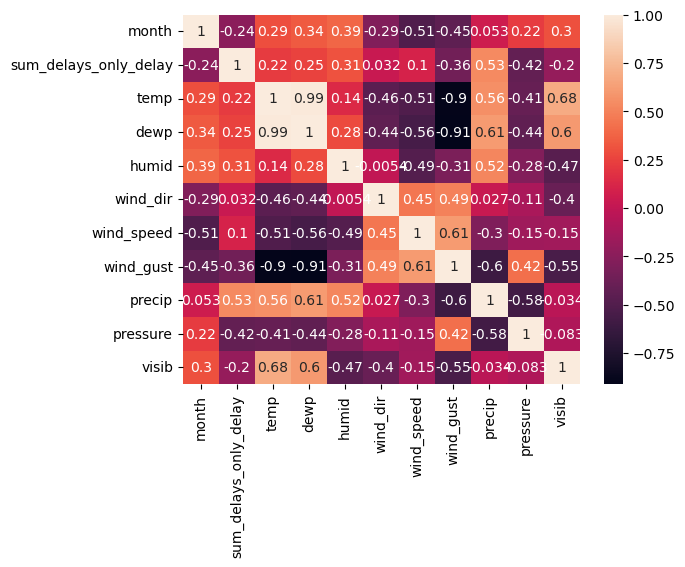

In [86]:
corr_matrix = correlation.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='month', ylabel='sum_delays_only_delay'>

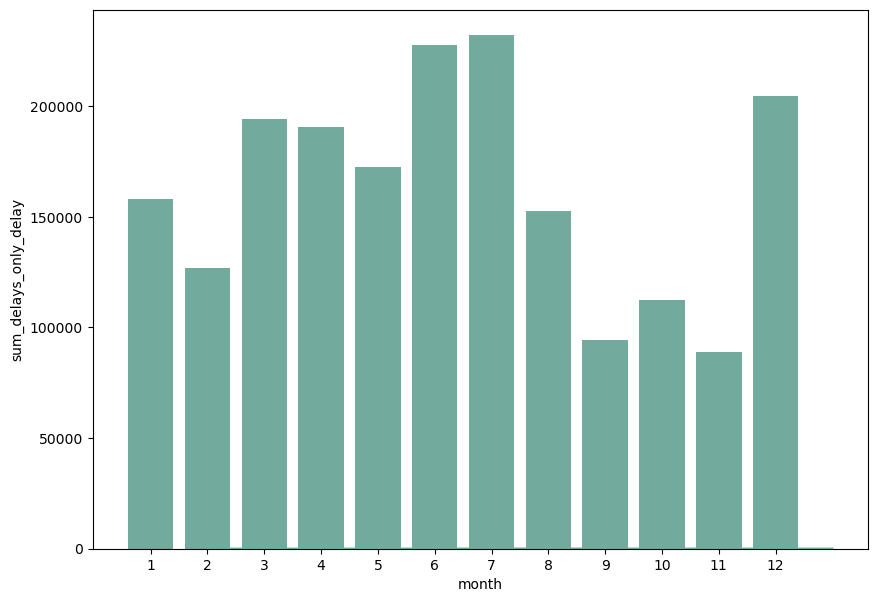

In [88]:
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="month", 
    y="sum_delays_only_delay", 
    data=correlation, 
    color='#69b3a2')

sns.lineplot(
    x="month", 
    y="temp", 
    data=correlation, 
    color='#69b3a2')